# **Predicción del precio en AirBnB**

Integrantes:

*   Paulina Acevedo 21.285.298-8
*   Francisca Ainol 20.833.815-3
*   Krishna Rojas   20.804.517-2

En este trabajo se aplican modelos de regresión lineal, tanto simples como múltiples, para predecir el precio de una propiedad en Airbnb, dirigido especialmente a anfitriones interesados en agregar propiedades a la plataforma. Para ello, se utilizarán características
relevantes del mercado, como el tipo de propiedad, la ubicación y las comodidades. A partir de retroalimentaciones anteriores al proyecto, se ajustó la propuesta inicial y se realizaron análisis exploratorios con regresiones simples, avanzando luego a regresiones  múltiples, donde se evaluaron los supuestos y se aplicó el modelo de predicción.

In [ ]:
#importamos librerias
#cargamos la base de datos inicial, con la cual queremos ver cuales son las variables que tuvieran mayor influecia en la regresión lineal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
mydata = pd.read_excel('dataProyecto.xlsx')

mydata.head()

Saving dataProyecto.xlsx to dataProyecto.xlsx


,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price
0,Minor,Apartment,Shared room,2,1.0,1,"{""Wireless Internet"",Kitchen,""Free Parking on ...",22
1,Greenwood,Tent,Shared room,2,1.0,1,{},25
2,North Beacon Hill,House,Private room,1,2.5,1,"{Internet,""Wireless Internet"",Washer,Dryer,""Sm...",25
3,First Hill,Apartment,Shared room,1,1.0,1,"{Internet,""Wireless Internet"",""Air Conditionin...",25
4,Capitol Hill,Apartment,Shared room,2,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",25


Para iniciar el análisis de regresión lineal simple, seleccionamos las variables independientes accommodates, bathrooms y bedrooms. Esta elección se basa en el análisis de correlación realizado en el entregable 2 del proyecto, donde estas variables mostraron las correlaciones más altas con
la variable dependiente price, con valores entre 0.5 y 0.6. Estas variables se analizaron para entender su capacidad de explicar la variabilidad en price.

In [ ]:
from sklearn import linear_model

#se obtienen los valores de las variables y se cambia la forma del array a un formato de matriz de tamaño
price=mydata.price.values.reshape(len(mydata['price']),1)
accommodates= mydata.accommodates.values.reshape(len(mydata['accommodates']),1)
bathrooms= mydata.bathrooms.values.reshape(len(mydata['bathrooms']),1)
bedrooms=mydata.bedrooms.values.reshape(len(mydata['bedrooms']),1)

#creamos el modelo de regresión lineal simple y entrenamos el modelo utilizando la variable accommodates como independiente
#y dependiente price, esto se repite para las otras variables
accommodates_model=linear_model.LinearRegression()
accommodates_model.fit(accommodates,price)

#devuelve el interceptoy el coeficiente del modelo
coeffs_accommodates=np.array(list(accommodates_model.intercept_.flatten())+list(accommodates_model.coef_.flatten()))
coeffs_accommodates=list(coeffs_accommodates)

bathrooms_model=linear_model.LinearRegression()
bathrooms_model.fit(bathrooms,price)
coeffs_bathrooms=np.array(list(bathrooms_model.intercept_.flatten())+list(bathrooms_model.coef_.flatten()))
coeffs_bathrooms=list(coeffs_bathrooms)

bedrooms_model=linear_model.LinearRegression()
bedrooms_model.fit(bedrooms,price)
coeffs_bedrooms=np.array(list(bedrooms_model.intercept_.flatten())+list(bedrooms_model.coef_.flatten()))
coeffs_bedrooms=list(coeffs_bedrooms)

#crear un diccionario con los resultados
dict_price={}
dict_price['accommodates']=coeffs_accommodates
dict_price['bathrooms']=coeffs_bathrooms
dict_price['bedrooms']=coeffs_bedrooms

#crear un dataframe con los coeficientes
metric_DF_SLR=pd.DataFrame(dict_price)
metric_DF_SLR.index=['Intercept','Coefficient']
metric_DF_SLR

,accommodates,bathrooms,bedrooms
Intercept,27.579292,30.349392,42.612533
Coefficient,29.371576,76.989050,64.744094


In [ ]:
#calcula el R^2 para cada modelo
accommodates_rsq=accommodates_model.score(accommodates,price)
bathrooms_rsq=bathrooms_model.score(bathrooms,price)
bedrooms_rsq=bedrooms_model.score(bedrooms,price)
#imprime los resultados por pantalla
print("Accommodates simple linear regression R-Square : ",accommodates_rsq)
print("Bathrooms simple linear regression R-Square : ",bathrooms_rsq)
print("Bedrooms simple linear regression R-Square : ",bedrooms_rsq)
#crea una lista con los resultados
list_rsq=[accommodates_rsq,bathrooms_rsq,bedrooms_rsq]
#muestra la lista
list_rsq

Accommodates simple linear regression R-Square :  0.4214235912606965
Bathrooms simple linear regression R-Square :  0.2585054643158702
Bedrooms simple linear regression R-Square :  0.3967873002151


[0.4214235912606965, 0.2585054643158702, 0.3967873002151]

In [ ]:
#muestra los interceptos y el R^2
metric_DF_SLR.loc['R-Square']=list_rsq
metric_DF_SLR

,accommodates,bathrooms,bedrooms
Intercept,27.579292,30.349392,42.612533
Coefficient,29.371576,76.989050,64.744094
R-Square,0.421424,0.258505,0.396787


Cada una de estas variables independientes tiene un coeficiente asociado, que indica su impacto unitario en el precio, así como un intercepto, que representa el valor estimado de price cuando la variable independiente es cero. Al observar el valor de R² (que mide la proporción de variabilidad explicada por cada variable), encontramos que accommodates tiene el valor más alto, alcanzando un R² de 0.421. Esto sugiere que es la variable con mayor capacidad predictiva entre las seleccionadas.
Por otro lado, las variables bathrooms y bedrooms también demostraron cierta capacidad explicativa, con valores de R² de 0.259 y 0.397, respectivamente, aunque en menor medida que accommodates. Estos resultados indican que accommodates es la variable más relevante y predictiva, por lo que será utilizada en el modelo de regresión lineal simple junto con bathrooms y bedrooms, que también influyen significativamente en la variabilidad del precio.

In [ ]:
from sklearn import linear_model

#crear y entrenar el modelo de regresión lineal múltiple
mlr_model=linear_model.LinearRegression()
mlr_model.fit(mydata[['accommodates', 'bedrooms', 'bathrooms']],mydata['price'])

#realiza predicciones del precio basada en las variables accommodates, bedrooms y bathrooms
mydata['price_pred']=mlr_model.predict(mydata[['accommodates', 'bedrooms', 'bathrooms']])
#calcula el error cuadrático
mydata['Error']=mydata['price']-mydata['price_pred']**2

#calcular y mostar el error cuadrático medio
MSE_MLR=mydata['Error'].mean()
print(f"MSE for Multiple Linear Regression MLR: {MSE_MLR}")

#calcular y mostrar el error cuadrático medio
r2_mlr=mlr_model.score(mydata[['accommodates', 'bedrooms', 'bathrooms']],mydata['price'])
print(f"R-squared for Multiple Linear Regression MLR: {r2_mlr}")

MSE for Multiple Linear Regression MLR: -19925.883993620406
R-squared for Multiple Linear Regression MLR: 0.47984968016951


Para realizar la regresión lineal múltiple, seleccionamos inicialmente las variables independientes accommodates, bedrooms y bathrooms, que mostraron los valores de R² más altos en el análisis previo. Al aplicar la regresión con estas variables, obtuvimos un R² de 0.4798, un valor cercano al de la variable accommodates por sí sola. Sin embargo, este valor resultó insuficiente para los objetivos del proyecto.

A partir de esta observación, decidimos incorporar la variable neighbourhood (vecindario en Seattle, Washington, donde se encuentra cada propiedad), dado que en el contexto inmobiliario la ubicación es fundamental para la fijación del precio. Sin embargo, con esta adición, el modelo alcanzó un R² de 0.5504 y un MSE de -20499.5289. Aunque hubo un ligero aumento en R², no fue significativo, por lo que optamos por agregar más variables.

In [ ]:
#convertir la columna neighbourhood en variables dummy
mydata=pd.get_dummies(mydata, columns=['neighbourhood'], drop_first=True)

#definir las variables predictoras
X=mydata[['bathrooms', 'bedrooms', 'accommodates'] + [col for col in mydata.columns if 'neighbourhood' in col]]
y=mydata['price']

mlr_model=linear_model.LinearRegression()
mlr_model.fit(X,y)

mydata['price_pred']=mlr_model.predict(X)
mydata['Error']=mydata['price']-mydata['price_pred']**2

MSE_MLR=mydata['Error'].mean()
print(f"MSE for Multiple Linear Regression MLR: {MSE_MLR}")

r2_mlr=mlr_model.score(X,y)
print(f"R-squared for Multiple Linear Regression MLR: {r2_mlr}")

MSE for Multiple Linear Regression MLR: -20499.52893458797
R-squared for Multiple Linear Regression MLR: 0.5504485125775854


In [ ]:
import pandas as pd
from sklearn import linear_model

neighbourhood_dummies = mydata[[col for col in mydata.columns if 'neighbourhood_' in col]]

# Crear dummies para 'room_type' and 'property_type' que son variables categoricas
room_type_dummies = pd.get_dummies(mydata, columns=['room_type'], drop_first=True, prefix='room_type_')
property_type_dummies = pd.get_dummies(mydata, columns=['property_type'], drop_first=True, prefix='property_type_')

# Concatenar las variables predictoras
X = pd.concat([
    mydata[['bathrooms', 'bedrooms', 'accommodates']],
    neighbourhood_dummies,
    room_type_dummies[[col for col in room_type_dummies.columns if 'room_type_' in col]],
    property_type_dummies[[col for col in property_type_dummies.columns if 'property_type_' in col]]
], axis=1)

y = mydata['price']

mlr_model = linear_model.LinearRegression()
mlr_model.fit(X, y)

mydata['price_pred'] = mlr_model.predict(X)
mydata['Error'] = mydata['price'] - mydata['price_pred']**2
mydata['price_pred']=np.maximum(mydata['price_pred'],0)

MSE_MLR = mydata['Error'].mean()
print(f"MSE for Multiple Linear Regression MLR: {MSE_MLR}")

r2_mlr = mlr_model.score(X, y)
print(f"R-squared for Multiple Linear Regression MLR: {r2_mlr}")

MSE for Multiple Linear Regression MLR: -20867.932905324942
R-squared for Multiple Linear Regression MLR: 0.5957882137255732


Posteriormente, añadimos las variables categóricas room_type y property_type,
transformadas para ser aplicadas en el modelo, ya que consideramos que podían mejorar la predicción del precio. Con esta modificación, el modelo mostró un R² de 0.5957 y un MSE de -20867. Sin embargo, aunque hubo un pequeño incremento en R², el rendimiento del modelo no mejoró significativamente y el MSE negativo continuaba siendo un indicador desfavorable. En consecuencia, decidimos excluir neighbourhood y en su lugar utilizar las coordenadas geográficas latitude y longitude de cada propiedad.

In [ ]:
#cargamos la data con la longitud y latitud de las propiedades, peusto que creemos que es relevante para el análisis de precio de las viviendad
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
mydata = pd.read_excel('dataProyectoSV.xlsx')

mydata.head()

Saving dataProyectoSV.xlsx to dataProyectoSV.xlsx


,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,latitude,longitude
0,Apartment,Entire home/apt,4,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85,47.636289,-122.371025
1,Apartment,Entire home/apt,4,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150,47.639123,-122.365666
2,House,Entire home/apt,11,4.5,5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975,47.629724,-122.369483
3,House,Entire home/apt,6,2.0,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450,47.632918,-122.372471
4,House,Private room,2,1.0,1,"{""Wireless Internet"",""Free Parking on Premises...",120,47.630525,-122.366174


Para capturar mejor el impacto de la ubicación, investigamos las coordenadas de Seattle y creamos una variable de distancia al centro de la ciudad. Clasificamos las propiedades en zonas de proximidad al centro utilizando una variable booleana para distinguir entre las ubicadas más cerca o más lejos. Asimismo, creamos una nueva variable zona, compuesta por tres categorías de distancia al centro.

In [ ]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans
import pandas as pd

city_center = (47.6062, -122.3321)  # Coordenadas del centro de Seattle

# Calculamos la distancia de cada propiedad al punto de referencia
mydata['distancia_al_centro'] = mydata.apply(lambda row: geodesic((row['latitude'], row['longitude']), city_center).km, axis=1)

kmeans = KMeans(n_clusters=3, random_state=0)
mydata['zona'] = kmeans.fit_predict(mydata[['latitude', 'longitude']])

# Creamos variables dummy para los clusters generados (zonas) ya que son variables booleanas
zona_dummies = pd.get_dummies(mydata['zona'], prefix='zona')
mydata = pd.concat([mydata, zona_dummies], axis=1)

mydata.to_csv('mydata_con_distancia_y_zonas_seattle.csv', index=False)

# Verificamos las primeras filas para confirmar las nuevas columnas
print(mydata[['latitude', 'longitude', 'distancia_al_centro', 'zona'] + zona_dummies.columns.tolist()].head())

    latitude   longitude  distancia_al_centro  zona  zona_0  zona_1  zona_2
0  47.636289 -122.371025             4.444449     1   False    True   False
1  47.639123 -122.365666             4.445822     1   False    True   False
2  47.629724 -122.369483             3.839054     2   False   False    True
3  47.632918 -122.372471             4.246691     1   False    True   False
4  47.630525 -122.366174             3.725044     2   False   False    True


In [ ]:
mydata.head()
#mostramos la data

,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,latitude,longitude,distancia_al_centro,zona,zona_0,zona_1,zona_2
0,Apartment,Entire home/apt,4,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85,47.636289,-122.371025,4.444449,1,False,True,False
1,Apartment,Entire home/apt,4,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150,47.639123,-122.365666,4.445822,1,False,True,False
2,House,Entire home/apt,11,4.5,5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975,47.629724,-122.369483,3.839054,2,False,False,True
3,House,Entire home/apt,6,2.0,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450,47.632918,-122.372471,4.246691,1,False,True,False
4,House,Private room,2,1.0,1,"{""Wireless Internet"",""Free Parking on Premises...",120,47.630525,-122.366174,3.725044,2,False,False,True


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
#cargamos la nueva data dividida en las zonas establecidad
mydata = pd.read_csv('mydata_con_distancia_y_zonas_seattle.csv')

#hacemos las variables dummies ya que son categóricas
room_type_dummies = pd.get_dummies(mydata['room_type'], prefix='room_type')
property_type_dummies = pd.get_dummies(mydata['property_type'], prefix='property_type')
mydata = pd.concat([mydata, room_type_dummies, property_type_dummies], axis=1)

#concatenamos las variables
X = mydata[['distancia_al_centro'] + zona_dummies.columns.tolist() +
           room_type_dummies.columns.tolist() +
           property_type_dummies.columns.tolist() +
           ['accommodates', 'bedrooms', 'bathrooms']]

y = mydata['price']  # Dependent variable (price)

#maneja los valores faltantes si es que los hay (en este caso no)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Create and train the linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

mydata['price_pred'] = mlr_model.predict(X)
mydata['Error'] = (mydata['price'] - mydata['price_pred'])**2

# Calculate the MSE (Mean Squared Error)
MSE_MLR = mydata['Error'].mean()
print(f"MSE for Multiple Linear Regression with Distance, Zones, bathrooms, bedrooms, accommodate, Room Type and Property Type: {MSE_MLR}")

# Calculate the R-squared to evaluate the model's fit
r2_mlr = mlr_model.score(X, y)
print(f"R-squared for Multiple Linear Regression with Distance, Zones, bathrooms, bedrooms, accommodate,Room Type and Property Type: {r2_mlr}")

MSE for Multiple Linear Regression with Distance, Zones, bathrooms, bedrooms, accommodate, Room Type and Property Type: 3518.7912756726946
R-squared for Multiple Linear Regression with Distance, Zones, bathrooms, bedrooms, accommodate,Room Type and Property Type: 0.5669402136952835


Finalmente, nuestro modelo de regresión lineal múltiple incluyó las variables
distancia_al_centro, zona, room_type, property_type, accommodates, bedrooms y
bathrooms. Con este conjunto de variables, obtuvimos un MSE de 3518.79 y un R² de 0.5669, lo cual reflejó una mejora en el MSE, aunque el R² seguía siendo bajo.

Decidimos entonces explorar una variable adicional que pudiera tener un impacto
significativo: amenities. Esta variable contiene características como TV, WIFI, aire acondicionado y estacionamiento, que pueden influir en el precio. Como se trataba de una lista de comodidades separadas por comas, aplicamos un proceso de vectorización para convertirla en variables que pudieran integrarse al modelo.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

mydata = pd.read_csv('mydata_con_distancia_y_zonas_seattle.csv')

mydata['amenities'] = mydata['amenities'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Vectorize the 'amenities', ya que está escrita como una lista de tipo {"WIFI", "TV",..., etc}
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
amenities_dummies = vectorizer.fit_transform(mydata['amenities']).toarray()
amenities_dummies_df = pd.DataFrame(amenities_dummies, columns=vectorizer.get_feature_names_out())

room_type_dummies = pd.get_dummies(mydata['room_type'], prefix='room_type')
property_type_dummies = pd.get_dummies(mydata['property_type'], prefix='property_type')

mydata = pd.concat([mydata, room_type_dummies, property_type_dummies, amenities_dummies_df], axis=1)

# Define the independent variables (X) for regression, including vectorized amenities
X = mydata[['distancia_al_centro'] + zona_dummies.columns.tolist() +
           room_type_dummies.columns.tolist() +
           property_type_dummies.columns.tolist() +
           amenities_dummies_df.columns.tolist() +
           ['accommodates', 'bedrooms', 'bathrooms']]

y = mydata['price']  # Dependent variable (price)

# Before fitting the model, impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Create and train the linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

# Make predictions and calculate the mean squared error
mydata['price_pred'] = mlr_model.predict(X)
mydata['Error'] = (mydata['price'] - mydata['price_pred'])**2  # Calculate the squared error

# Calculate the MSE (Mean Squared Error)
MSE_MLR = mydata['Error'].mean()
print(f"MSE for Multiple Linear Regression : {MSE_MLR}")

# Calculate the R-squared to evaluate the model's fit
r2_mlr = mlr_model.score(X, y)
print(f"R-squared for Multiple Linear Regression : {r2_mlr}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


MSE for Multiple Linear Regression : 332.97978778940427
R-squared for Multiple Linear Regression : 0.9590199746314018


Con la inclusión de amenities, el modelo final incluyó las variables: distancia_al_centro, zona, room_type, property_type, accommodates, bedrooms, bathrooms y amenities. El modelo resultante arrojó un MSE de 332.9797 y un R² de 0.9501, un valor que consideramos adecuado para los objetivos del proyecto.

In [ ]:
import statsmodels.formula.api as smf

mydata['zona'] = mydata['zona'].astype('category')
mydata['property_type'] = mydata['property_type'].astype('category')
mydata['room_type'] = mydata['room_type'].astype('category')
mydata['amenities'] = mydata['amenities'].astype('category')

lm1 = smf.ols(formula='price ~ distancia_al_centro + C(zona) + accommodates + bathrooms + bedrooms + C(property_type) + C(room_type) + C(amenities)', data=mydata).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3.578
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.09e-49
Time:                        03:24:54   Log-Likelihood:                -13795.
No. Observations:                3191   AIC:                         3.313e+04
Df Residuals:                     423   BIC:                         4.992e+04
Df Model:                        2767                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

A partir de los resultados, podemos decir que la prob(omnibus) dice que no se distribuye normal, además el R^2 fue de 0,959 y el R^2 ajustado fue de 0,691 lo cual indica una baja precisión del modelo. Así que a partir de este resultado, decidimos verificar si el modelo cumple con los supuestos de la regresión lineal múltiple, que incluyen:
1. Linealidad de los datos.
2. Normalidad de la distribución de los residuos.
3. Homocedasticidad: varianza constante de los residuos.
4. Independencia e idéntica distribución de los residuos.
Para confirmar el cumplimiento de estos supuestos, generamos los gráficos de residuos que se presentan a continuación y que permiten observar el comportamiento del modelo.


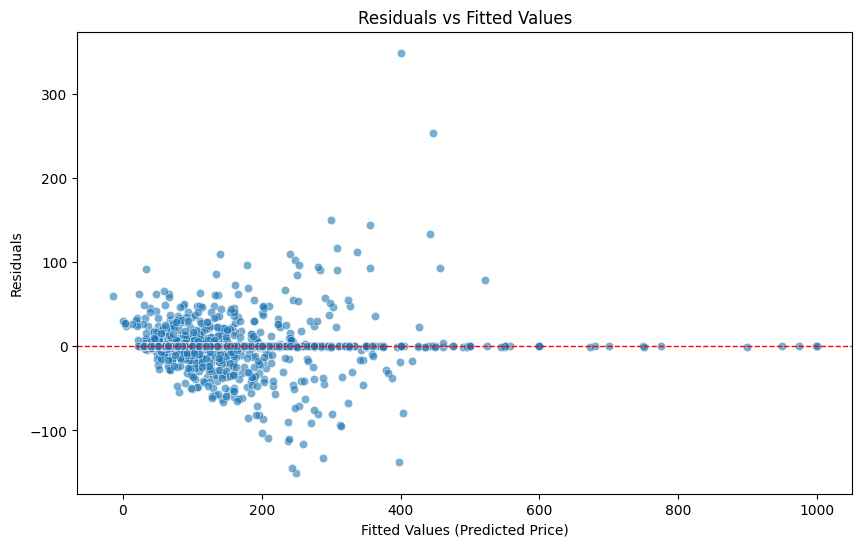

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos
mydata['Residuals'] = mydata['price'] - mydata['price_pred']

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mydata['price_pred'], y=mydata['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Línea horizontal en 0
plt.xlabel('Fitted Values (Predicted Price)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Este gráfico indica la presencia de heterocedasticidad en los residuos, ya que muestran un patrón disperso y se alejan en valores extremos.

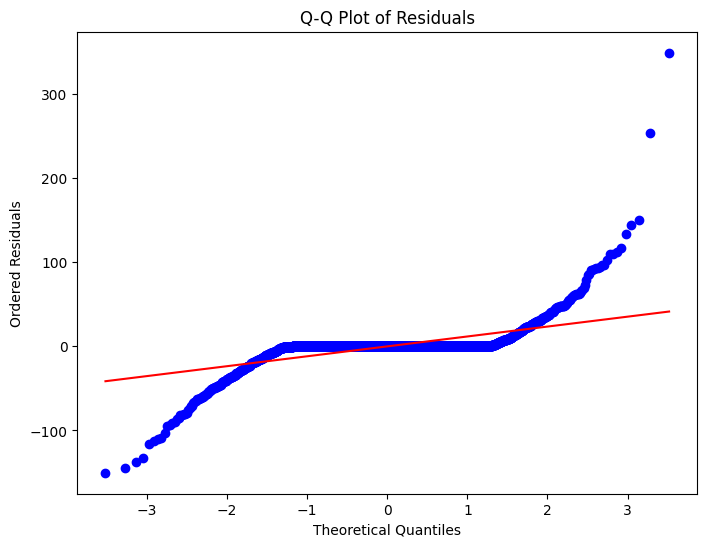

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar el gráfico Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(mydata['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.ylabel("Ordered Residuals")
plt.xlabel("Theoretical Quantiles")
plt.show()

Este gráfico, idealmente, debería mostrar una línea clara que indique la normalidad en la distribución de los residuos. Sin embargo, observamos segmentos irregulares que sugieren una distribución no normal.

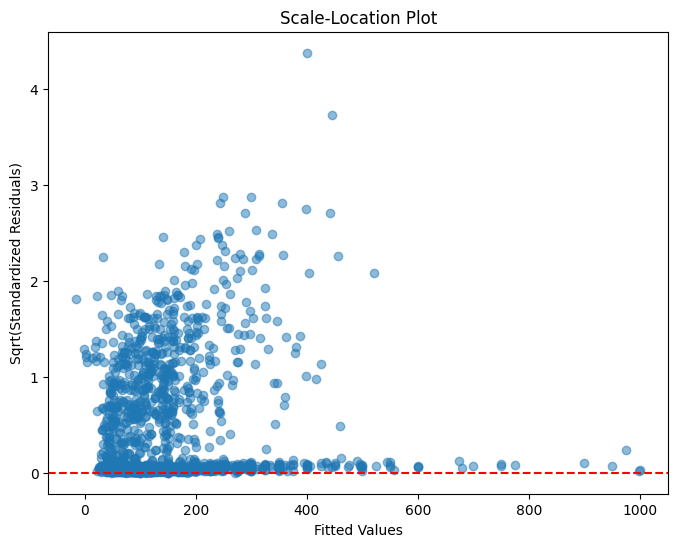

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular los residuos estandarizados
mydata['Standardized_Residuals'] = mydata['Residuals'] / np.std(mydata['Residuals'])

sqrt_residuals = np.sqrt(np.abs(mydata['Standardized_Residuals']))

# Generar el gráfico Scale-Location
plt.figure(figsize=(8, 6))
plt.scatter(mydata['price_pred'], sqrt_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.show()

Este gráfico señala que el modelo no captura completamente la variabilidad de los datos, además de mostrar errores mayores en ciertos rangos de predicción, confirmando también la presencia de heterocedasticidad.

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:867: RuntimeWarning: divide by zero encountered in divide
  cooks_d2 *= hii / (1 - hii)


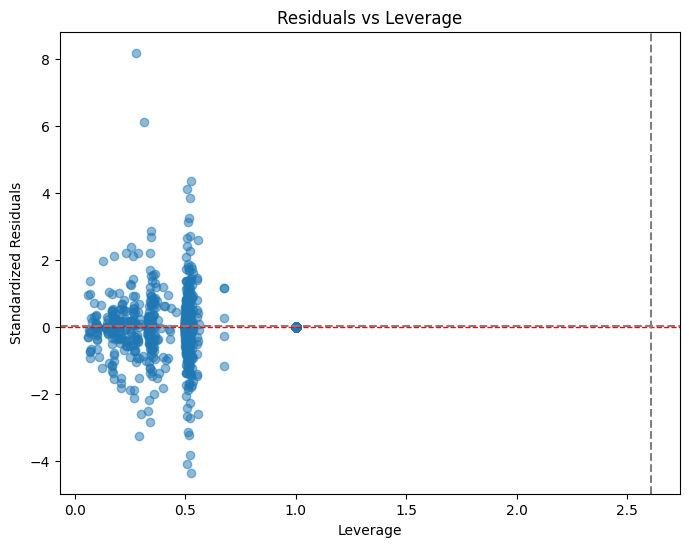

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = y.apply(pd.to_numeric, errors='coerce').fillna(0)

X = X.to_numpy().astype(np.float64)
y = y.to_numpy().astype(np.float64)

# Obtener leverage y residuos estandarizados
influence = sm.OLS(y, X).fit().get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Crear el gráfico de Residuals vs Leverage
plt.figure(figsize=(8, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage')

# Agregar línea de Cook's Distance
cooks_distance, _ = influence.cooks_distance
p = X.shape[1]  # número de predictores en el modelo
plt.axhline(y=2 / np.sqrt(len(y)), color='grey', linestyle='--')
plt.axvline(x=3 * p / len(y), color='grey', linestyle='--')

plt.show()

Este gráfico revela puntos con un impacto considerable en el modelo, lo que sugiere que deben analizarse en mayor detalle para evaluar su influencia.

En conclusión, el análisis de regresión lineal múltiple evidencia que los supuestos del modelo no se cumplen completamente. Observamos que los residuos no siguen una distribución normal, hay presencia de heterocedasticidad y existen puntos con alto apalancamiento que influyen de manera significativa en el modelo. Esto último puede estar generando predicciones inusualmente bajas, lo que a su vez causa residuos negativos debido a que el precio predicho es menor al precio real.
Para abordar estos problemas, decidimos aplicar una transformación logarítmica a la variable dependiente price. Esto permite reducir los residuos negativos.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

mydata_log = mydata.copy()

# Aplicar logaritmo a la variable dependiente
mydata_log['log_price'] = np.log(mydata_log['price'])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
zona_encoded = encoder.fit_transform(mydata_log[['zona']])
zona_encoded_df = pd.DataFrame(zona_encoded, columns=[f"zona_{i}" for i in range(zona_encoded.shape[1])])

X = pd.concat([mydata_log[['distancia_al_centro', 'accommodates', 'bathrooms', 'bedrooms']],
               zona_encoded_df,
               room_type_dummies,
               property_type_dummies,
               amenities_dummies_df], axis=1)

# La variable dependiente ahora es log(price)
y = mydata_log['log_price']

# Definir y entrenar el modelo de regresión lineal
mlr_model = LinearRegression()
mlr_model.fit(X, y)

# Predecir y calcular el error (en escala logarítmica)
mydata_log['log_price_predicted'] = mlr_model.predict(X)

# Convertir las predicciones de vuelta a la escala original
mydata_log['price_predicted'] = np.exp(mydata_log['log_price_predicted'])

# Calcular el error cuadrático medio (MSE) en la escala original
mydata_log['Error'] = (mydata_log['price'] - mydata_log['price_predicted'])**2
MSE_MLR = mydata_log['Error'].mean()
print(f"MSE for Multiple Linear Regression with log-transformed price: {MSE_MLR}")

# Calcular R^2 en la escala logarítmica
r2_mlr = mlr_model.score(X, y)
print(f"R^2 for Multiple Linear Regression with log-transformed price: {r2_mlr}")


MSE for Multiple Linear Regression with log-transformed price: 312.3331241380689
R^2 for Multiple Linear Regression with log-transformed price: 0.9726606138831788


Tras realizar la regresión con esta transformación logarítmica en price, obtuvimos un MSE de 312.33 y un R² de 0.97266, lo que representa una mejora significativa en comparación con el modelo anterior. Estos resultados indican una mejor adecuación del modelo.
A continuación, presentamos los gráficos de residuos ajustados, para observar si ahora se cumplen los supuestos de la regresión lineal múltiple en esta versión mejorada del modelo.


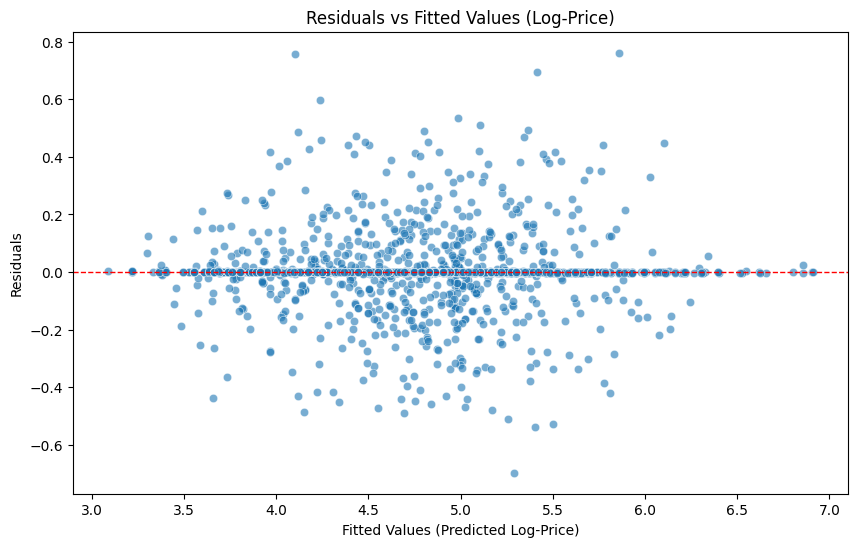

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos en la escala logarítmica
mydata_log['Residuals'] = mydata_log['log_price'] - mydata_log['log_price_predicted']

# Crear el gráfico de residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mydata_log['log_price_predicted'], y=mydata_log['Residuals'], alpha=0.6)

# Línea horizontal en 0 para facilitar la visualización de residuos positivos y negativos
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Fitted Values (Predicted Log-Price)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Log-Price)')
plt.show()

Este gráfico muestra que los residuos están distribuidos alrededor de cero, aunque se observan valores extremos y cierta dispersión en algunas  áreas, lo que indica una leve presencia de heterocedasticidad.

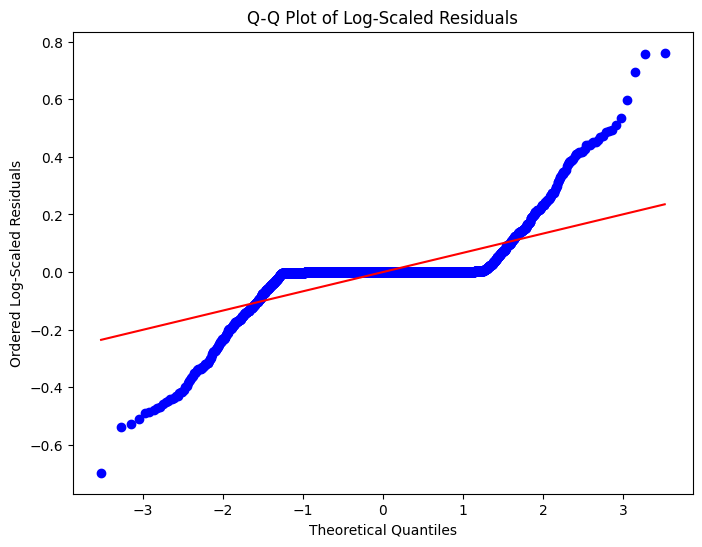

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

mydata_log['Residuals'] = mydata_log['log_price'] - mydata_log['log_price_predicted']

# Generar el gráfico Q-Q de los residuos
plt.figure(figsize=(8, 6))
stats.probplot(mydata_log['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Scaled Residuals")
plt.ylabel("Ordered Log-Scaled Residuals")
plt.xlabel("Theoretical Quantiles")
plt.show()

En teoría, este gráfico debería mostrar una distribución normal de los residuos, alineándose con la línea de referencia. Sin embargo, observamos tramos irregulares, lo que sugiere una distribución no completamente normal. Esta irregularidad puede deberse a la variabilidad en los precios de las viviendas, ya que existen valores atípicos significativos, como propiedades de US$1,000 y US$999, mientras que el valor mínimo es de US$22.

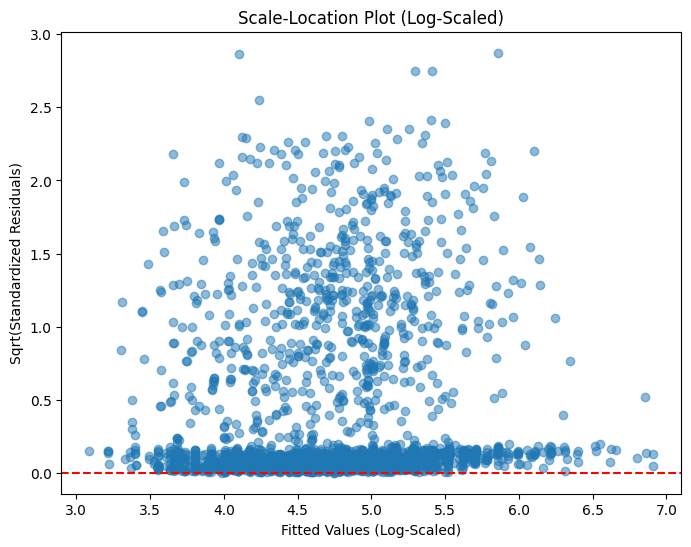

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mydata_log['Residuals'] = mydata_log['log_price'] - mydata_log['log_price_predicted']
mydata_log['Standardized_Log_Residuals'] = mydata_log['Residuals'] / np.std(mydata_log['Residuals'])

# Raíz cuadrada del valor absoluto de los residuos estandarizados
sqrt_log_residuals = np.sqrt(np.abs(mydata_log['Standardized_Log_Residuals']))

# Generar el gráfico Scale-Location
plt.figure(figsize=(8, 6))
plt.scatter(mydata_log['log_price_predicted'], sqrt_log_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (Log-Scaled)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.show()

Este gráfico muestra una dispersión “uniforme” de los residuos, aunque hay una leve tendencia de dispersión en ciertos rangos, confirmando una ligera heterocedasticidad.

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:867: RuntimeWarning: divide by zero encountered in divide
  cooks_d2 *= hii / (1 - hii)


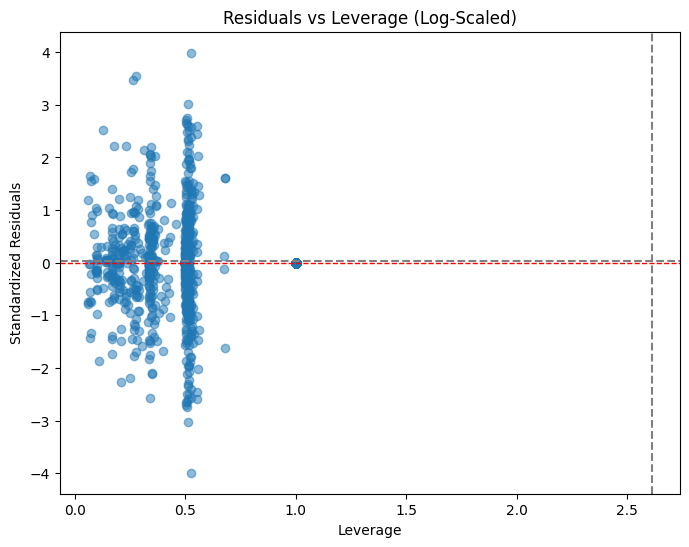

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Transformar la variable dependiente a escala logarítmica
mydata['log_price'] = np.log(mydata['price'])

if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X = X.to_numpy().astype(np.float64)

y = mydata['log_price'].apply(pd.to_numeric, errors='coerce').fillna(0)
y = y.to_numpy().astype(np.float64)

# Ajustar el modelo y obtener leverage y residuos estandarizados
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Crear el gráfico de Residuals vs Leverage
plt.figure(figsize=(8, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage (Log-Scaled)')

# Agregar líneas de referencia de Cook's Distance
cooks_distance, _ = influence.cooks_distance
p = X.shape[1]
plt.axhline(y=2 / np.sqrt(len(y)), color='grey', linestyle='--')
plt.axvline(x=3 * p / len(y), color='grey', linestyle='--')

plt.show()

En este gráfico, identificamos puntos con un impacto considerable en el modelo, principalmente los valores atípicos mencionados anteriormente, que deben analizarse para comprender mejor su influencia en los
resultados.
A partir de este análisis, concluimos que los supuestos de la regresión lineal múltiple no se cumplen completamente, ya que persisten problemas de normalidad en los residuos,heterocedasticidad y puntos de alto apalancamiento. Para mejorar el modelo y lograr una distribución normal de los residuos, decidimos realizar un ajuste adicional.
Observando los tramos en el Q-Q Plot of Log-Scaled Residuals, optamos por dividir los precios de las viviendas en tres segmentos: - - -
* Tramo 1: desde el valor mínimo hasta la media de los precios.
* Tramo 2: alrededor de la media de los precios.
* Tramo 3: desde la media hasta el valor máximo.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

mydata_log = mydata.copy()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
zona_encoded = encoder.fit_transform(mydata_log[['zona']])
zona_encoded_df = pd.DataFrame(zona_encoded, columns=[f"zona_{i}" for i in range(zona_encoded.shape[1])])

# Vectorizar amenities usando MultiLabelBinarizer (suponiendo que 'amenities' es una lista de elementos)
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(mydata_log['amenities'])
amenities_encoded_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)

property_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
property_encoded = property_encoder.fit_transform(mydata_log[['property_type']])
property_encoded_df = pd.DataFrame(property_encoded, columns=[f"property_type_{i}" for i in range(property_encoded.shape[1])])

room_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
room_encoded = room_encoder.fit_transform(mydata_log[['room_type']])
room_encoded_df = pd.DataFrame(room_encoded, columns=[f"room_type_{i}" for i in range(room_encoded.shape[1])])

mydata_log = pd.concat([mydata_log, zona_encoded_df, amenities_encoded_df, property_encoded_df, room_encoded_df], axis=1)

# Obtener la media de la variable 'price' y definir un margen
price_mean = mydata_log['price'].mean()
price_std = mydata_log['price'].std()
low_threshold = price_mean - price_std
high_threshold = price_mean + price_std

# Dividir el dataframe en subconjuntos de precios
low_price = mydata_log[mydata_log['price'] <= low_threshold]
mid_price = mydata_log[(mydata_log['price'] > low_threshold) & (mydata_log['price'] <= high_threshold)]
high_price = mydata_log[mydata_log['price'] > high_threshold]

# Aplicar logaritmo a la variable dependiente 'price' en cada subconjunto
low_price['log_price'] = np.log(low_price['price'])
mid_price['log_price'] = np.log(mid_price['price'])
high_price['log_price'] = np.log(high_price['price'])

# Definir las características (X) y la variable objetivo (y) para cada subconjunto
features = ['distancia_al_centro', 'accommodates', 'bathrooms', 'bedrooms'] + list(zona_encoded_df.columns) + list(amenities_encoded_df.columns) + list(property_encoded_df.columns) + list(room_encoded_df.columns)

X_low = low_price[features]
X_mid = mid_price[features]
X_high = high_price[features]

y_low = low_price['log_price']
y_mid = mid_price['log_price']
y_high = high_price['log_price']

# Definir y entrenar el modelo de regresión lineal para cada subconjunto
mlr_model_low = LinearRegression()
mlr_model_low.fit(X_low, y_low)

mlr_model_mid = LinearRegression()
mlr_model_mid.fit(X_mid, y_mid)

mlr_model_high = LinearRegression()
mlr_model_high.fit(X_high, y_high)

# Predicción para cada subconjunto
low_price['log_price_predicted'] = mlr_model_low.predict(X_low)
mid_price['log_price_predicted'] = mlr_model_mid.predict(X_mid)
high_price['log_price_predicted'] = mlr_model_high.predict(X_high)

# Convertir las predicciones de vuelta a la escala original
low_price['price_predicted'] = np.exp(low_price['log_price_predicted'])
mid_price['price_predicted'] = np.exp(mid_price['log_price_predicted'])
high_price['price_predicted'] = np.exp(high_price['log_price_predicted'])

# Calcular el error cuadrático medio (MSE) en la escala original para cada subconjunto
MSE_low = mean_squared_error(low_price['price'], low_price['price_predicted'])
MSE_mid = mean_squared_error(mid_price['price'], mid_price['price_predicted'])
MSE_high = mean_squared_error(high_price['price'], high_price['price_predicted'])

print(f"MSE for Low Price Subset: {MSE_low}")
print(f"MSE for Mid Price Subset: {MSE_mid}")
print(f"MSE for High Price Subset: {MSE_high}")

# Calcular R^2 para cada subconjunto
r2_low = mlr_model_low.score(X_low, y_low)
r2_mid = mlr_model_mid.score(X_mid, y_mid)
r2_high = mlr_model_high.score(X_high, y_high)

print(f"R^2 for Low Price Subset: {r2_low}")
print(f"R^2 for Mid Price Subset: {r2_mid}")
print(f"R^2 for High Price Subset: {r2_high}")

MSE for Low Price Subset: 2.697889885126391
MSE for Mid Price Subset: 803.976138070397
MSE for High Price Subset: 12305.076913893692
R^2 for Low Price Subset: 0.793302626955746
R^2 for Mid Price Subset: 0.5955148161690745
R^2 for High Price Subset: 0.33189874665427366


<ipython-input-23-f505120faff5>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['log_price'] = np.log(low_price['price'])
<ipython-input-23-f505120faff5>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_price['log_price'] = np.log(mid_price['price'])
<ipython-input-23-f505120faff5>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Al aplicar este enfoque de segmentación de precios, observamos que el modelo de regresión muestra un buen desempeño para los precios bajos, con un MSE bajo y un alto R². Sin embargo, el rendimiento disminuye cuando se trata de precios más altos, lo que sugiere que el modelo necesita ajustes adicionales para mejorar su precisión en este segmento.
A partir de los resultados obtenidos, es necesario realizar una nueva verificación de los supuestos de la regresión lineal múltiple. A continuación, se presentan los gráficos correspondientes para evaluar nuevamente el cumplimiento de dichos supuestos.

<ipython-input-24-775b03f85369>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['Residuals'] = low_price['price'] - low_price['price_predicted']
<ipython-input-24-775b03f85369>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_price['Residuals'] = mid_price['price'] - mid_price['price_predicted']
<ipython-input-24-775b03f85369>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

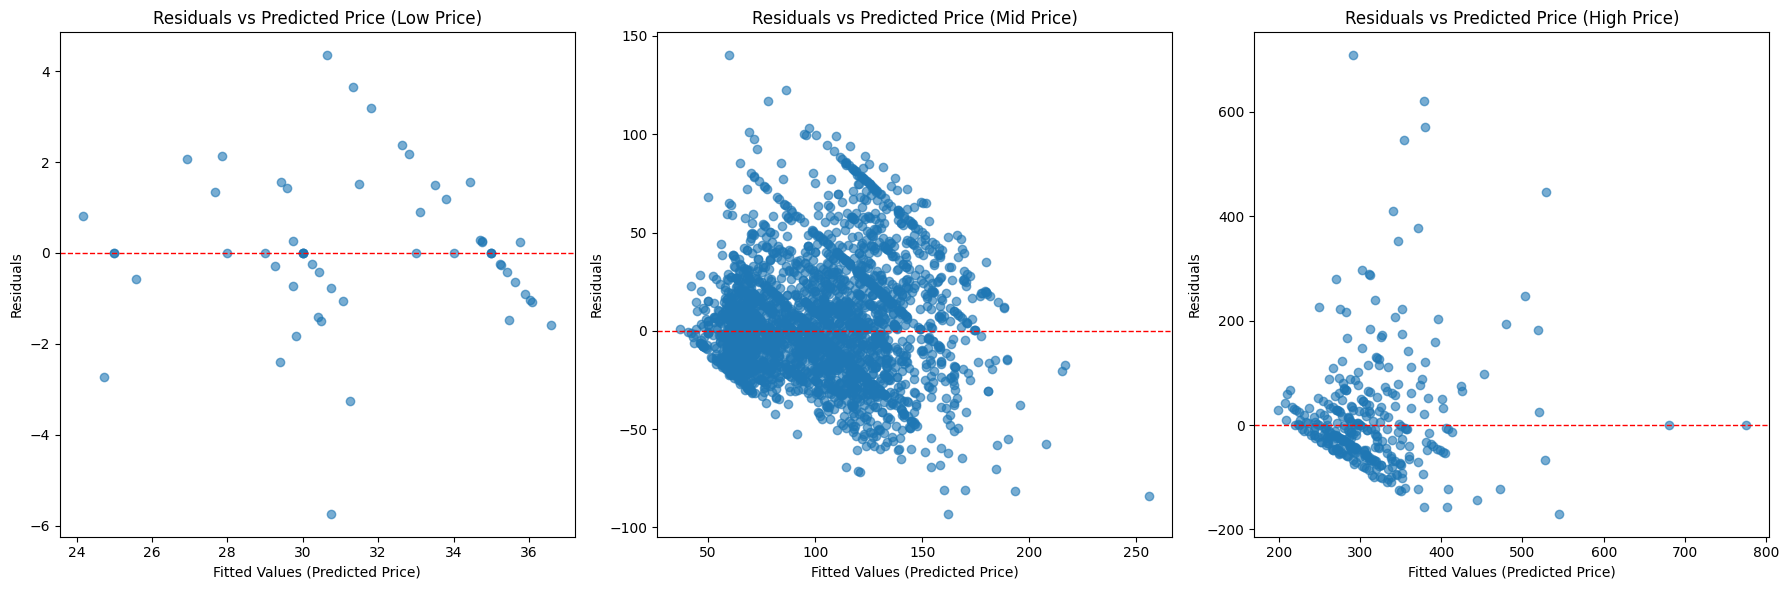

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos para cada subconjunto
low_price['Residuals'] = low_price['price'] - low_price['price_predicted']
mid_price['Residuals'] = mid_price['price'] - mid_price['price_predicted']
high_price['Residuals'] = high_price['price'] - high_price['price_predicted']

# Crear gráficos de residuos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subconjunto de bajo precio
axes[0].scatter(low_price['price_predicted'], low_price['Residuals'], alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_xlabel('Fitted Values (Predicted Price)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Price (Low Price)')

# Subconjunto de precio medio
axes[1].scatter(mid_price['price_predicted'], mid_price['Residuals'], alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_xlabel('Fitted Values (Predicted Price)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Price (Mid Price)')

# Subconjunto de alto precio
axes[2].scatter(high_price['price_predicted'], high_price['Residuals'], alpha=0.6)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_xlabel('Fitted Values (Predicted Price)')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs Predicted Price (High Price)')

plt.tight_layout()
plt.show()

• Low Price: En este segmento, no se observan patrones claros y la dispersión de los residuos es bastante uniforme, lo que indica que el modelo se ajusta bien a los precios bajos.
• Mid Price: Para los precios medios, el modelo presenta algunas dificultades en la predicción. Se observa la presencia de heterocedasticidad, ya que la variabilidad de los errores aumenta a medida que crece el valor predicho.
• High Price: En este caso, el modelo tiene mayores dificultades para predecir los precios altos, ya que la variabilidad de los errores es considerablemente alta. Esto sugiere una presencia de heterocedasticidad aún más pronunciada en este tramo.

En resumen, el modelo se comporta adecuadamente para los precios bajos, de manera moderada para los precios medios y presenta su mayor dificultad para predecir los precios altos.

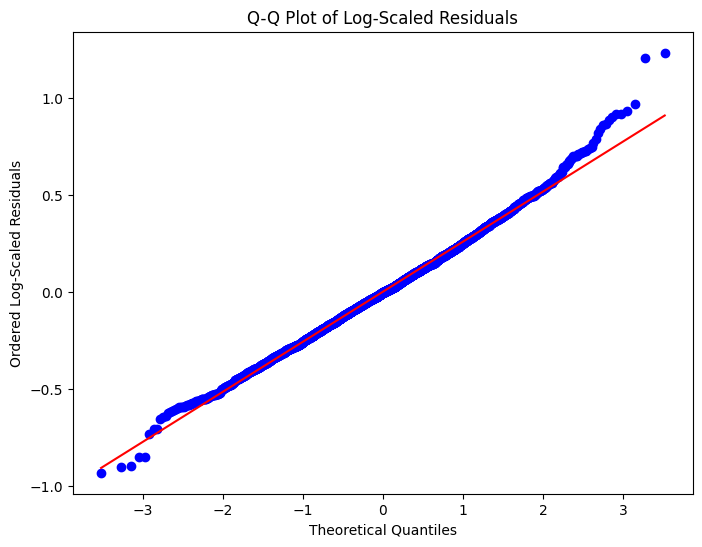

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# concatenar los tramos en los que se dividió el precio
mydata_log = pd.concat([low_price, mid_price, high_price])

mydata_log['Residuals'] = mydata_log['log_price'] - mydata_log['log_price_predicted']

plt.figure(figsize=(8, 6))
stats.probplot(mydata_log['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Scaled Residuals")
plt.ylabel("Ordered Log-Scaled Residuals")
plt.xlabel("Theoretical Quantiles")
plt.show()

Para generar el gráfico, fue necesario concatenar los tres tramos en los que dividimos los datos, permitiendo observar cómo los residuos se aproximan a una distribución normal. En el gráfico resultante, se aprecia que, en general, los residuos siguen una distribución normal, aunque con una ligera desviación en los extremos. Esta desviación se debe a los valores atípicos mencionados anteriormente, que influyen en las predicciones de los tramos más altos y bajos. En los próximos pasos, nos enfocaremos en mejorar el ajuste del modelo en estos extremos para minimizar la influencia de dichos valores atípicos.

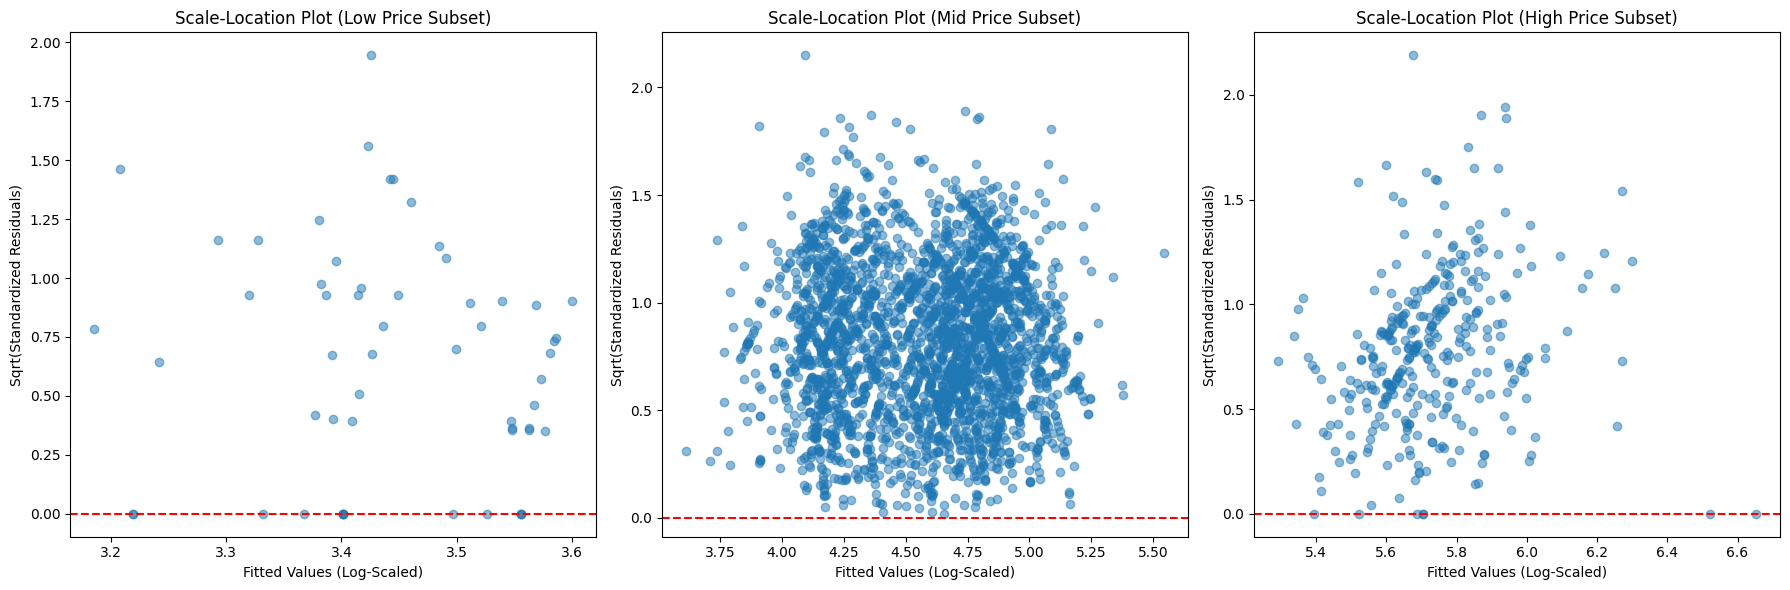

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular los residuos estandarizados en la escala logarítmica para cada subconjunto
low_price['Residuals'] = low_price['log_price'] - low_price['log_price_predicted']
low_price['Standardized_Log_Residuals'] = low_price['Residuals'] / np.std(low_price['Residuals'])

mid_price['Residuals'] = mid_price['log_price'] - mid_price['log_price_predicted']
mid_price['Standardized_Log_Residuals'] = mid_price['Residuals'] / np.std(mid_price['Residuals'])

high_price['Residuals'] = high_price['log_price'] - high_price['log_price_predicted']
high_price['Standardized_Log_Residuals'] = high_price['Residuals'] / np.std(high_price['Residuals'])

# Calcular la raíz cuadrada del valor absoluto de los residuos estandarizados para cada subconjunto
low_price['Sqrt_Standardized_Log_Residuals'] = np.sqrt(np.abs(low_price['Standardized_Log_Residuals']))
mid_price['Sqrt_Standardized_Log_Residuals'] = np.sqrt(np.abs(mid_price['Standardized_Log_Residuals']))
high_price['Sqrt_Standardized_Log_Residuals'] = np.sqrt(np.abs(high_price['Standardized_Log_Residuals']))

# Generar el gráfico Scale-Location para cada subconjunto
plt.figure(figsize=(18, 6))

# Subconjunto de precios bajos
plt.subplot(1, 3, 1)
plt.scatter(low_price['log_price_predicted'], low_price['Sqrt_Standardized_Log_Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (Low Price Subset)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')

# Subconjunto de precios medios
plt.subplot(1, 3, 2)
plt.scatter(mid_price['log_price_predicted'], mid_price['Sqrt_Standardized_Log_Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (Mid Price Subset)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')

# Subconjunto de precios altos
plt.subplot(1, 3, 3)
plt.scatter(high_price['log_price_predicted'], high_price['Sqrt_Standardized_Log_Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (High Price Subset)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')

plt.tight_layout()
plt.show()


• Low price subset: Aunque la muestra es pequeña, en este rango los residuos presentan una dispersión aleatoria sin patrones definidos, lo que sugiere homocedasticidad en los precios bajos.
• Mid price subset: En este gráfico, se observa una mayor concentración de datos con una dispersión algo aleatoria. Aunque no se aprecia un patrón claro, existe una ligera tendencia a variar en ciertos rangos, lo que indica la presencia de heterocedasticidad leve en este segmento.
• High price subset: Aquí, la dispersión de los residuos aumenta a medida que los valores ajustados crecen, lo cual confirma la presencia de heterocedasticidad. Este fenómeno impacta la precisión de las predicciones para los precios altos.
En resumen, el modelo muestra homocedasticidad en el low price subset, una leve
heterocedasticidad en el mid price subset, y una heterocedasticidad más marcada en el high price subset. Esta última afecta la precisión de las predicciones en el rango de precios altos, por lo que buscaremos ajustar el modelo para mejorar su desempeño en este segmento.

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:867: RuntimeWarning: divide by zero encountered in divide
  cooks_d2 *= hii / (1 - hii)


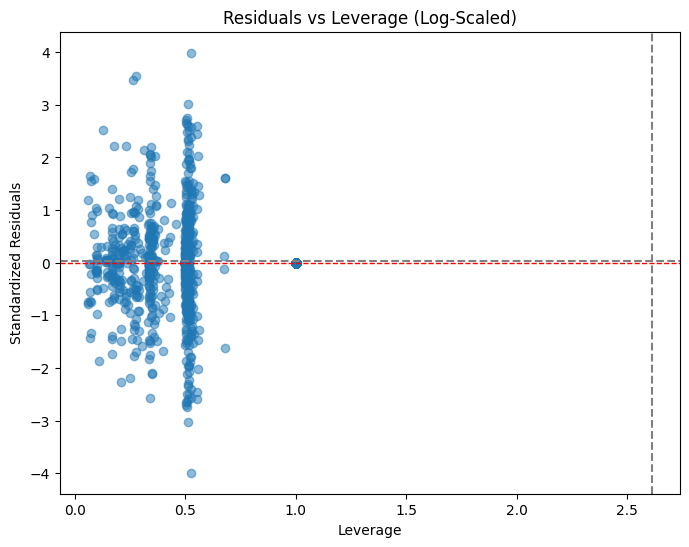

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

mydata['log_price'] = np.log(mydata['price'])

if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X = X.to_numpy().astype(np.float64)
y = mydata['log_price'].apply(pd.to_numeric, errors='coerce').fillna(0)
y = y.to_numpy().astype(np.float64)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Crear el gráfico de Residuales vs Leverage
plt.figure(figsize=(8, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage (Log-Scaled)')

# Agregar líneas de referencia de Cook's Distance
cooks_distance, _ = influence.cooks_distance
p = X.shape[1]
plt.axhline(y=2 / np.sqrt(len(y)), color='grey', linestyle='--')
plt.axvline(x=3 * p / len(y), color='grey', linestyle='--')

plt.show()

Para este mismo gráfico, se puede observar el mismo comportamiento o muy parecido a los anteriores.


Con respecto a las pruebas de hipótesis, para poder realizar el análisis lo primero que se hizo fue separar la data de entrenamiento (80%) con la de prueba (20%), en base a la data de entrenamiento se obtuvieron los siguientes resultados, los cuales serán analizados a continuación.  

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mydata['log_price'] = np.log(mydata['price'])

# Separar las variables predictoras (X) y la variable dependiente (y)
X = mydata.drop(columns=['price', 'log_price'])  # Elimina 'price' y 'log_price' de X
y = mydata['log_price']

# Asegurarse de que X y y son numéricos, manejar valores faltantes
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = y.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convertir X e y a arreglos NumPy
X = X.to_numpy().astype(np.float64)
y = y.to_numpy().astype(np.float64)

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal en el conjunto de entrenamiento
model = sm.OLS(y_train, X_train).fit()

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse_test}")

# Imprimir resumen del modelo
print(model.summary())

Mean Squared Error en el conjunto de prueba: 1046848.3001389686
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     24.69
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          4.53e-141
Time:                        03:49:41   Log-Likelihood:                 4600.2
No. Observations:                2552   AIC:                            -4680.
Df Residuals:                     292   BIC:                             8528.
Df Model:                        2259                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

En segundo lugar, tenemos que comprobar si la hipótesis nula es rechazada o no. Donde la  

H0:  𝛽𝑛 = 0  (𝑛𝑜 ℎ𝑎𝑦 𝑟𝑒𝑙𝑎𝑐𝑖ó𝑛 𝑒𝑛𝑡𝑟𝑒 𝑙𝑎𝑠 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 𝑖𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑖𝑒𝑛𝑡𝑒𝑠 𝑦 𝑙𝑎 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒 𝑑𝑒𝑝𝑒𝑛𝑑𝑖𝑒𝑛𝑡𝑒 con n= {1,…,8}

H1:𝛽𝑖 ≠ 0   
Con respecto a los resultados, se obtuvo que el valor p es muy pequeño, en este caso 4.53𝑒−141y con un nivel de significancia de 5%, por lo tanto, el valor de p-value es menor que 0.05, lo que indica que tenemos evidencia fuerte para rechazar Ho. Entonces, podemos concluir que al menos una de las variables independientes tiene impacto significativo en el precio (variable dependiente). Por lo tanto, el modelo es el modelo es estadísticamente significativo, lo que implica que las variables incluidas en la regresión están relacionadas con la variable dependiente y contribuye a la predicción.

El estadístico F tiene un valor de 24,69 que es relativamente alto, lo que refuerza la significancia general del modelo, donde el conjunto de variables independientes tiene alguna relación significativa con la variable dependiente.  

El valor de R cuadrado es 0,995, que indica que el 99.5% de la variabilidad en la variable dependiente está explicada por las variables dependientes, lo que sugiere una buena precisión del modelo.  

Al ver el R cuadrado ajustado, que es el que más nos interesa analizar para la regresión lineal múltiple, ya que elimina el efecto de agregar tantas variables, se obtiene un valor de 0,954 que es igualmente alto, lo que indica nuevamente que este modelo posee una alta precisión dentro de la data de entrenamiento.

Por último, al calcular el MSE del conjunto de prueba, nos dio un valor muy grande, lo que indica que las predicciones del modelo están lejos de los
valores reales, este caso, 1.046.848. Por lo tanto, sugiere que el modelo aún se encuentra cometiendo errores dentro de las predicciones, ya que como se mencionó anteriormente el modelo no estaría cumpliendo por completo los supuestos de la regresión lineal múltiple.

In [ ]:
#importar la data sin valores atípicos para probar si la heterocedasticidad disminuye
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
mydata = pd.read_excel('dataProyectoSPuntos.xlsx')

mydata.head()

Saving dataProyectoSPuntos.xlsx to dataProyectoSPuntos.xlsx


,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,latitude,longitude
0,Apartment,Entire home/apt,4,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85,47.636289,-122.371025
1,Apartment,Entire home/apt,4,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150,47.639123,-122.365666
2,House,Entire home/apt,6,2.0,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450,47.632918,-122.372471
3,House,Private room,2,1.0,1,"{""Wireless Internet"",""Free Parking on Premises...",120,47.630525,-122.366174
4,House,Private room,2,1.0,1,"{""Wireless Internet"",""Free Parking on Premises...",80,47.636605,-122.368519


In [ ]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans
import pandas as pd

city_center = (47.6062, -122.3321)  # Coordenadas del centro de Seattle

# Calculamos la distancia de cada propiedad al punto de referencia
mydata['distancia_al_centro'] = mydata.apply(lambda row: geodesic((row['latitude'], row['longitude']), city_center).km, axis=1)

kmeans = KMeans(n_clusters=3, random_state=0)
mydata['zona'] = kmeans.fit_predict(mydata[['latitude', 'longitude']])

# Creamos variables dummy para los clusters generados (zonas) ya que son variables booleanas
zona_dummies = pd.get_dummies(mydata['zona'], prefix='zona')
mydata = pd.concat([mydata, zona_dummies], axis=1)

mydata.to_csv('mydata_con_distancia_y_zonas_seattleSP.csv', index=False)

# Verificamos las primeras filas para confirmar las nuevas columnas
print(mydata[['latitude', 'longitude', 'distancia_al_centro', 'zona'] + zona_dummies.columns.tolist()].head())

    latitude   longitude  distancia_al_centro  zona  zona_0  zona_1  zona_2
0  47.636289 -122.371025             4.444449     1   False    True   False
1  47.639123 -122.365666             4.445822     1   False    True   False
2  47.632918 -122.372471             4.246691     1   False    True   False
3  47.630525 -122.366174             3.725044     1   False    True   False
4  47.636605 -122.368519             4.350028     1   False    True   False


In [ ]:
mydata.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,latitude,longitude,distancia_al_centro,zona,zona_0,zona_1,zona_2
0,Apartment,Entire home/apt,4,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85,47.636289,-122.371025,4.444449,1,False,True,False
1,Apartment,Entire home/apt,4,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150,47.639123,-122.365666,4.445822,1,False,True,False
2,House,Entire home/apt,6,2.0,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450,47.632918,-122.372471,4.246691,1,False,True,False
3,House,Private room,2,1.0,1,"{""Wireless Internet"",""Free Parking on Premises...",120,47.630525,-122.366174,3.725044,1,False,True,False
4,House,Private room,2,1.0,1,"{""Wireless Internet"",""Free Parking on Premises...",80,47.636605,-122.368519,4.350028,1,False,True,False


Bueno, para mejorar el modelo en base a lo anterior, eliminamos los outliers para ver si mejora las predicciones y se cumplen los supuestos de la regresión lineal múltiple.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

mydata_log = mydata.copy()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
zona_encoded = encoder.fit_transform(mydata_log[['zona']])
zona_encoded_df = pd.DataFrame(zona_encoded, columns=[f"zona_{i}" for i in range(zona_encoded.shape[1])])

# Vectorizar amenities usando MultiLabelBinarizer (suponiendo que 'amenities' es una lista de elementos)
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(mydata_log['amenities'])
amenities_encoded_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)

property_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
property_encoded = property_encoder.fit_transform(mydata_log[['property_type']])
property_encoded_df = pd.DataFrame(property_encoded, columns=[f"property_type_{i}" for i in range(property_encoded.shape[1])])

room_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
room_encoded = room_encoder.fit_transform(mydata_log[['room_type']])
room_encoded_df = pd.DataFrame(room_encoded, columns=[f"room_type_{i}" for i in range(room_encoded.shape[1])])

mydata_log = pd.concat([mydata_log, zona_encoded_df, amenities_encoded_df, property_encoded_df, room_encoded_df], axis=1)

# Obtener la media de la variable 'price' y definir un margen
price_mean = mydata_log['price'].mean()
price_std = mydata_log['price'].std()
low_threshold = price_mean - price_std
high_threshold = price_mean + price_std

# Dividir el dataframe en subconjuntos de precios
low_price = mydata_log[mydata_log['price'] <= low_threshold]
mid_price = mydata_log[(mydata_log['price'] > low_threshold) & (mydata_log['price'] <= high_threshold)]
high_price = mydata_log[mydata_log['price'] > high_threshold]

# Aplicar logaritmo a la variable dependiente 'price' en cada subconjunto
low_price['log_price'] = np.log(low_price['price'])
mid_price['log_price'] = np.log(mid_price['price'])
high_price['log_price'] = np.log(high_price['price'])

# Definir las características (X) y la variable objetivo (y) para cada subconjunto
features = ['distancia_al_centro', 'accommodates', 'bathrooms', 'bedrooms'] + list(zona_encoded_df.columns) + list(amenities_encoded_df.columns) + list(property_encoded_df.columns) + list(room_encoded_df.columns)

X_low = low_price[features]
X_mid = mid_price[features]
X_high = high_price[features]

y_low = low_price['log_price']
y_mid = mid_price['log_price']
y_high = high_price['log_price']

# Definir y entrenar el modelo de regresión lineal para cada subconjunto
mlr_model_low = LinearRegression()
mlr_model_low.fit(X_low, y_low)

mlr_model_mid = LinearRegression()
mlr_model_mid.fit(X_mid, y_mid)

mlr_model_high = LinearRegression()
mlr_model_high.fit(X_high, y_high)

# Predicción para cada subconjunto
low_price['log_price_predicted'] = mlr_model_low.predict(X_low)
mid_price['log_price_predicted'] = mlr_model_mid.predict(X_mid)
high_price['log_price_predicted'] = mlr_model_high.predict(X_high)

# Convertir las predicciones de vuelta a la escala original
low_price['price_predicted'] = np.exp(low_price['log_price_predicted'])
mid_price['price_predicted'] = np.exp(mid_price['log_price_predicted'])
high_price['price_predicted'] = np.exp(high_price['log_price_predicted'])

# Calcular el error cuadrático medio (MSE) en la escala original para cada subconjunto
MSE_low = mean_squared_error(low_price['price'], low_price['price_predicted'])
MSE_mid = mean_squared_error(mid_price['price'], mid_price['price_predicted'])
MSE_high = mean_squared_error(high_price['price'], high_price['price_predicted'])

print(f"MSE for Low Price Subset: {MSE_low}")
print(f"MSE for Mid Price Subset: {MSE_mid}")
print(f"MSE for High Price Subset: {MSE_high}")

# Calcular R^2 para cada subconjunto
r2_low = mlr_model_low.score(X_low, y_low)
r2_mid = mlr_model_mid.score(X_mid, y_mid)
r2_high = mlr_model_high.score(X_high, y_high)

print(f"R^2 for Low Price Subset: {r2_low}")
print(f"R^2 for Mid Price Subset: {r2_mid}")
print(f"R^2 for High Price Subset: {r2_high}")

MSE for Low Price Subset: 5.80457778757365
MSE for Mid Price Subset: 771.5916522561427
MSE for High Price Subset: 6900.595151824116
R^2 for Low Price Subset: 0.6685786764673571
R^2 for Mid Price Subset: 0.5607688664358849
R^2 for High Price Subset: 0.3710637761247204


<ipython-input-32-f505120faff5>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['log_price'] = np.log(low_price['price'])
<ipython-input-32-f505120faff5>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_price['log_price'] = np.log(mid_price['price'])
<ipython-input-32-f505120faff5>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Se puede decir que para el R^2 en:

 * Precios bajos, el modelo funciona relativamente bien con un R^2 = 0,67, lo que indica que aproximadamente el 67% de la variabilidad en los precios bajos es explicada por las variables predictoras.
 * Para precios medios y altos, el rendimiento disminuye un poco, destacandose aún más esta disminució en los precios altos.

 Lo que sugiere que el modelo tiene una mejor capacidad predictiva para propiedades de precios bajos y medios que para altos.

 Por otra parte, el MSE para precios bajos es bastante precisa, mientras que para los precios medios indica un error más elevado, pero razonable para el rango de precios. Finalmente, para precios altos, muestra un error muy elevado, lo que podría ser por una alta variabilidad en los precios altos, si bien eliminamos los outliers, la variabilidad sigue siendo aún alta en este rango de precios o que hay datos más específicos para las propiedades de precios altos, que el modelo no estaría capturando.

<ipython-input-33-775b03f85369>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['Residuals'] = low_price['price'] - low_price['price_predicted']
<ipython-input-33-775b03f85369>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_price['Residuals'] = mid_price['price'] - mid_price['price_predicted']
<ipython-input-33-775b03f85369>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

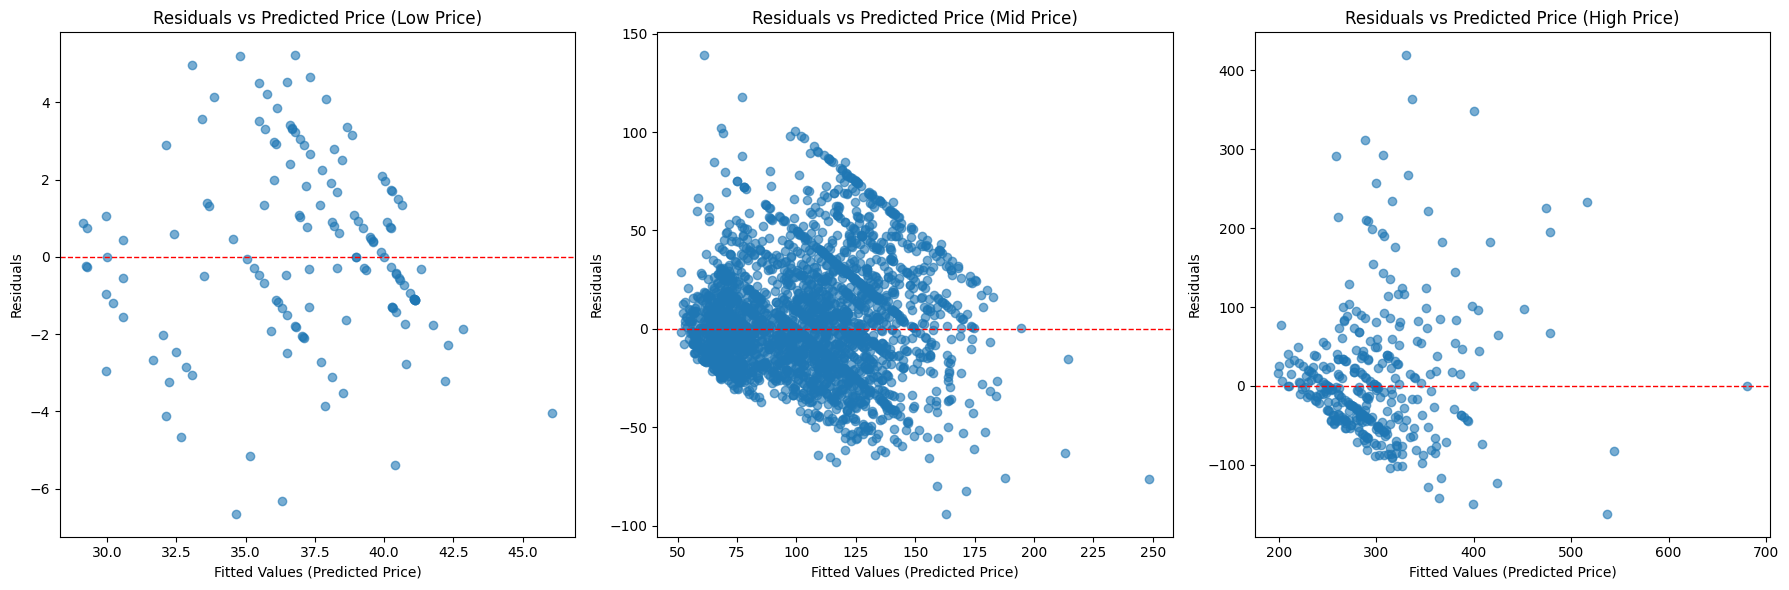

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos para cada subconjunto
low_price['Residuals'] = low_price['price'] - low_price['price_predicted']
mid_price['Residuals'] = mid_price['price'] - mid_price['price_predicted']
high_price['Residuals'] = high_price['price'] - high_price['price_predicted']

# Crear gráficos de residuos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subconjunto de bajo precio
axes[0].scatter(low_price['price_predicted'], low_price['Residuals'], alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_xlabel('Fitted Values (Predicted Price)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Price (Low Price)')

# Subconjunto de precio medio
axes[1].scatter(mid_price['price_predicted'], mid_price['Residuals'], alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_xlabel('Fitted Values (Predicted Price)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Price (Mid Price)')

# Subconjunto de alto precio
axes[2].scatter(high_price['price_predicted'], high_price['Residuals'], alpha=0.6)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_xlabel('Fitted Values (Predicted Price)')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs Predicted Price (High Price)')

plt.tight_layout()
plt.show()

Para low_price los residuales estan dispersos, no parece haber un patron claro (lineal o en curva), lo que es una señal positiva para la validez del supuesto de linealidad.

Para mid_price los residuos muestra mayor dispersión que en los precios bajos, sigue existiendo una ligera heterocedasticidad, especialmente en valores más altos, hay algunos patrones que pueden estar surgiendo, lo que el modelo sigue no captando completamente la relacion en este rango.

Finalmente, para high_price los residuos están extremadamente dispersos, la heterocedasticidad es muy evidente, hay un patrón "triangular" lo que sugiere que el modelo puede estar subestimando o sobreestimando los precios altos.

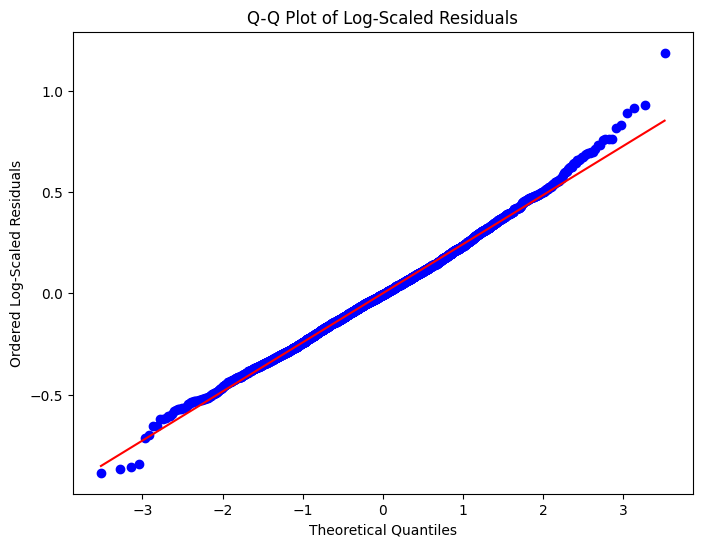

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# concatenar los tramos en los que se dividió el precio
mydata_log = pd.concat([low_price, mid_price, high_price])

mydata_log['Residuals'] = mydata_log['log_price'] - mydata_log['log_price_predicted']

plt.figure(figsize=(8, 6))
stats.probplot(mydata_log['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Scaled Residuals")
plt.ylabel("Ordered Log-Scaled Residuals")
plt.xlabel("Theoretical Quantiles")
plt.show()

El modelo cumple razonablemente bien con la normalidad de los residuales, en el rango medio particularmente, tiene pequeñas desviaciones en las colas que puede ser por no linealidades en datos originales. Para ello, si aplicamos regresiones como ridge o lasso, para ver si mejoraba, pero seguíamos sin cumplir con los supuestos, por lo que decidimos no agregarlas a este colab.

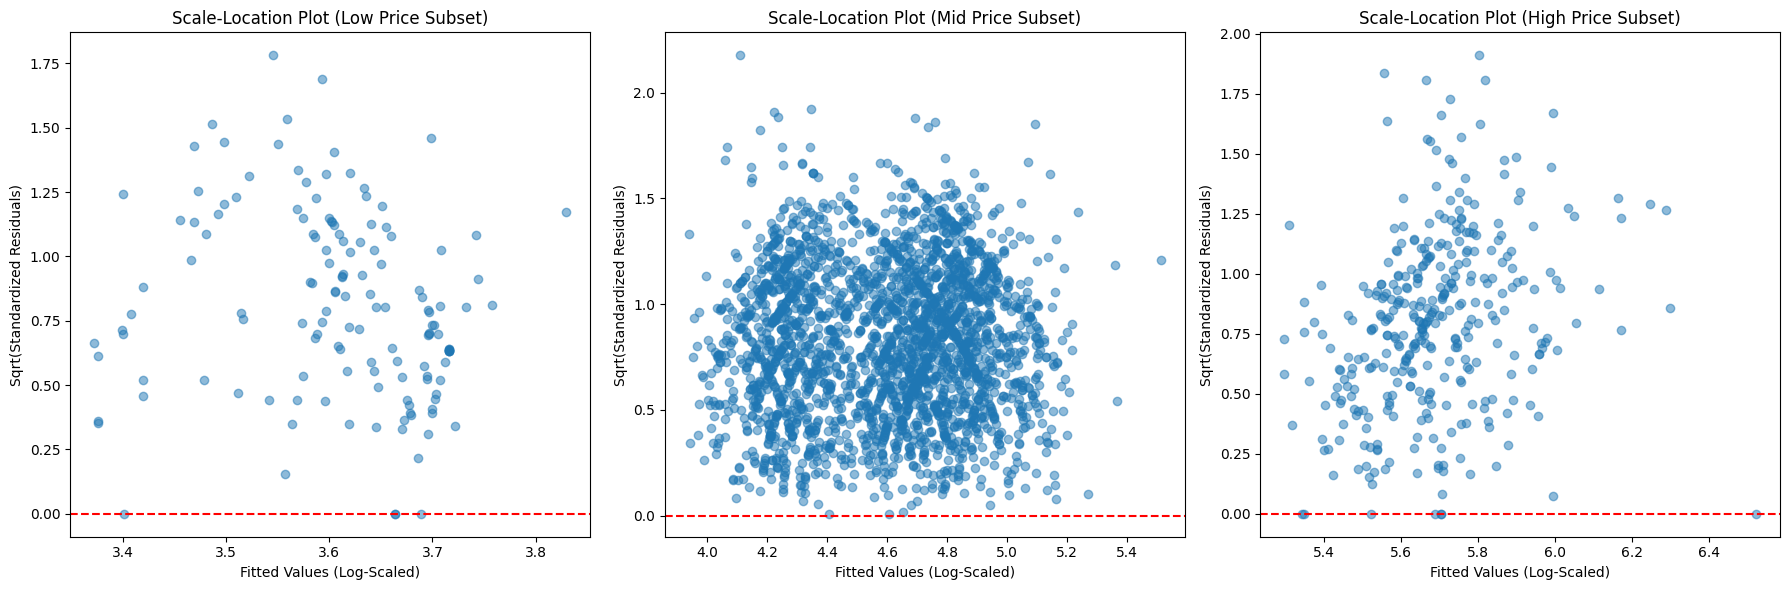

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular los residuos estandarizados en la escala logarítmica para cada subconjunto
low_price['Residuals'] = low_price['log_price'] - low_price['log_price_predicted']
low_price['Standardized_Log_Residuals'] = low_price['Residuals'] / np.std(low_price['Residuals'])

mid_price['Residuals'] = mid_price['log_price'] - mid_price['log_price_predicted']
mid_price['Standardized_Log_Residuals'] = mid_price['Residuals'] / np.std(mid_price['Residuals'])

high_price['Residuals'] = high_price['log_price'] - high_price['log_price_predicted']
high_price['Standardized_Log_Residuals'] = high_price['Residuals'] / np.std(high_price['Residuals'])

# Calcular la raíz cuadrada del valor absoluto de los residuos estandarizados para cada subconjunto
low_price['Sqrt_Standardized_Log_Residuals'] = np.sqrt(np.abs(low_price['Standardized_Log_Residuals']))
mid_price['Sqrt_Standardized_Log_Residuals'] = np.sqrt(np.abs(mid_price['Standardized_Log_Residuals']))
high_price['Sqrt_Standardized_Log_Residuals'] = np.sqrt(np.abs(high_price['Standardized_Log_Residuals']))

# Generar el gráfico Scale-Location para cada subconjunto
plt.figure(figsize=(18, 6))

# Subconjunto de precios bajos
plt.subplot(1, 3, 1)
plt.scatter(low_price['log_price_predicted'], low_price['Sqrt_Standardized_Log_Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (Low Price Subset)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')

# Subconjunto de precios medios
plt.subplot(1, 3, 2)
plt.scatter(mid_price['log_price_predicted'], mid_price['Sqrt_Standardized_Log_Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (Mid Price Subset)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')

# Subconjunto de precios altos
plt.subplot(1, 3, 3)
plt.scatter(high_price['log_price_predicted'], high_price['Sqrt_Standardized_Log_Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot (High Price Subset)')
plt.xlabel('Fitted Values (Log-Scaled)')
plt.ylabel('Sqrt(Standardized Residuals)')

plt.tight_layout()
plt.show()


Low_price: La dispersión de los residuos es algo irregular y muestra un ligero patrón en forma de abanico, lo que sugiere que la varianza de los errores aumenta a medida que los valores ajustados crecen. Esto es un indicio de heterocedasticidad.
Mid_price: unque la dispersión de los residuos es más uniforme, se observan puntos alejados de la línea roja horizontal, lo que todavía sugiere la presencia de heterocedasticidad.
High_price: Aquí se observa un patrón más claro en el que la varianza de los residuos cambia con el aumento de los valores ajustados, mostrando de forma evidente la heterocedasticidad.

En general, estos gráficos indican que la varianza de los errores no es constante en todo el rango de los valores ajustados, lo que viola el supuesto de homocedasticidad en la regresión lineal.

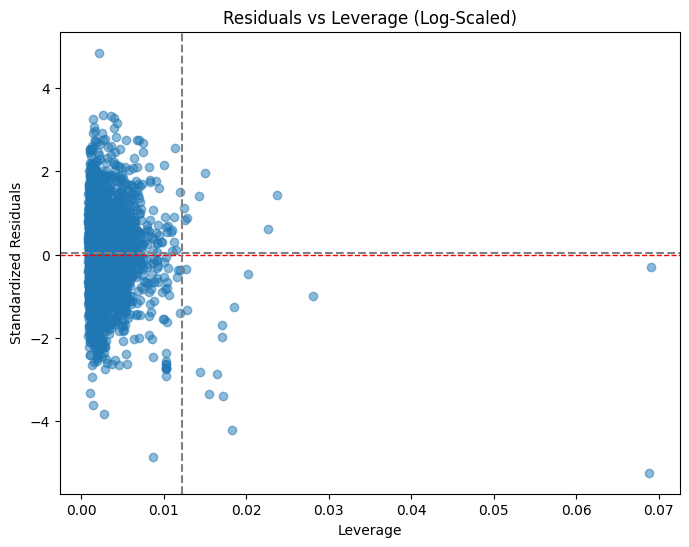

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

mydata['log_price'] = np.log(mydata['price'])

# Instead of manually defining 'features', get the columns directly from your DataFrame:
features = mydata.columns.tolist()
# Remove 'log_price' and 'price' as they are your target variables
features.remove('log_price')
features.remove('price') # Assuming 'price' is your original target variable

X = mydata[features] # Assign X to the dataframe containing your feature data

if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X = X.to_numpy().astype(np.float64)
y = mydata['log_price'].apply(pd.to_numeric, errors='coerce').fillna(0)
y = y.to_numpy().astype(np.float64)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Crear el gráfico de Residuales vs Leverage
plt.figure(figsize=(8, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage (Log-Scaled)')

# Agregar líneas de referencia de Cook's Distance
cooks_distance, _ = influence.cooks_distance
p = X.shape[1]
plt.axhline(y=2 / np.sqrt(len(y)), color='grey', linestyle='--')
plt.axvline(x=3 * p / len(y), color='grey', linestyle='--')

plt.show()

La mayoría de los puntos están agrupados cerca del eje de leverage bajo, lo cual es normal. Sin embargo, hay algunos puntos alejados tanto en términos de leverage como de residuos, lo que sugiere que podrían ser puntos influyentes.

La persistencia de la heterocedasticidad en el modelo de regresión lineal múltiple se puede deber a múltiples factores. Entre ellos, variables omitidas que influyen en la varianza de los errores, relaciones no lineales entre las variables predictoras y la variable dependiente, o una estructura de datos segmentada que no se refleja en el modelo. También puede ser resultado de transformaciones insuficientes en las variables predictoras, errores de medición, o puntos de datos con alta influencia. Aunque intentamos realizar otros tipos de pruebas, seguimos sin cumplir con el supuesto de heterocedasticidad, pero en comparación con literaturas del mismo tipo, pudimos mejorar significativamente las predicciones aunque sin cumplir los supuestos, esto ayuda a futuras investigaciones a que se mejore en este aspecto el modelo aplicado.